In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.datasets
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import t



In [18]:
df = pd.read_csv('Advertising.csv')
df.drop(axis=1, labels= df.columns[0], inplace= True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


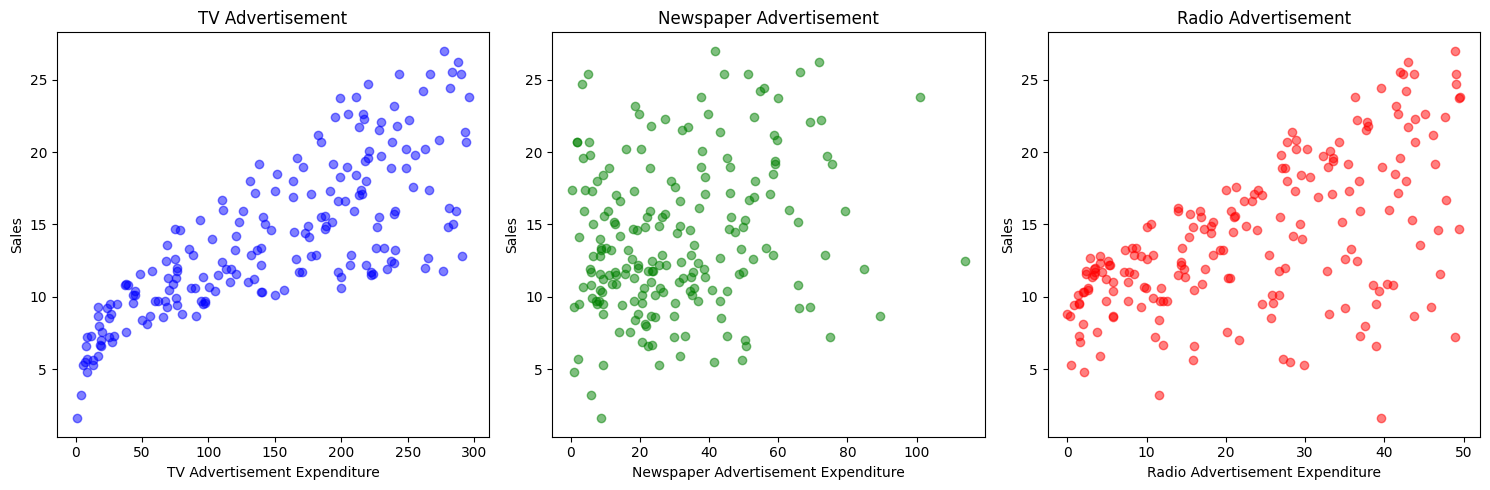

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['TV'], df['sales'], color='blue', alpha=0.5)
axes[0].set_title('TV Advertisement')
axes[0].set_xlabel('TV Advertisement Expenditure')
axes[0].set_ylabel('Sales')

axes[1].scatter(df['newspaper'], df['sales'], color='green', alpha=0.5)
axes[1].set_title('Newspaper Advertisement')
axes[1].set_xlabel('Newspaper Advertisement Expenditure')
axes[1].set_ylabel('Sales')

axes[2].scatter(df['radio'], df['sales'], color='red', alpha=0.5)
axes[2].set_title('Radio Advertisement')
axes[2].set_xlabel('Radio Advertisement Expenditure')
axes[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()

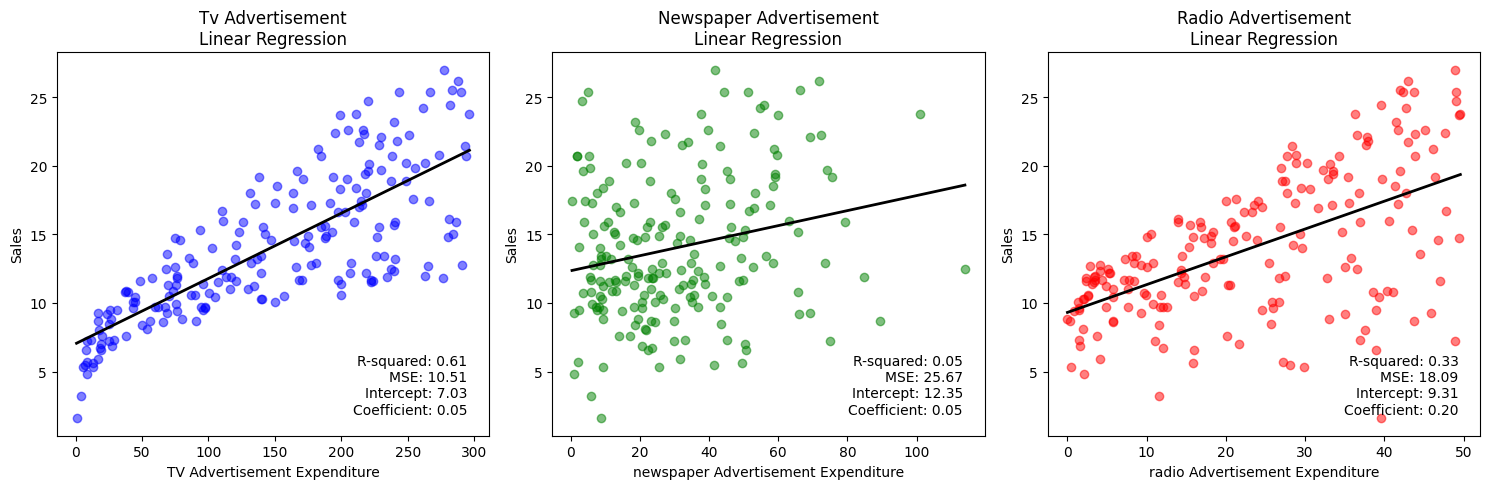

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['blue', 'green', 'red']

# Iterate over each feature and plot the scatter plot with the regression line
for i, feature in enumerate(['TV', 'newspaper', 'radio']):
    # Scatter plot
    axes[i].scatter(df[feature], df['sales'], color=colors[i], alpha=0.5)
    axes[i].set_xlabel(feature + ' Advertisement Expenditure')
    axes[i].set_ylabel('Sales')
    
    # Linear regression
    model = linear_model.LinearRegression()
    x = df[feature].values.reshape(-1, 1)
    y = df['sales'].values
    model.fit(x, y)
    
    # Plot regression line
    x_range = np.linspace(df[feature].min(), df[feature].max(), 100)
    y_pred = model.predict(x_range.reshape(-1, 1))
    axes[i].plot(x_range, y_pred, color='black', linewidth=2)  # Changed regression line color to black
    
    # Calculate R-squared and MSE
    y_pred_all = model.predict(x)
    r2 = r2_score(y, y_pred_all)
    mse = mean_squared_error(y, y_pred_all)
    
    # Display R-squared and MSE, intercept, and coefficients
    axes[i].text(0.95, 0.05, f'R-squared: {r2:.2f}\nMSE: {mse:.2f}\nIntercept: {model.intercept_:.2f}\nCoefficient: {model.coef_[0]:.2f}', 
                 transform=axes[i].transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')  # Adjusted text position
    
    # Title
    axes[i].set_title(feature.capitalize() + ' Advertisement\nLinear Regression')  # Capitalized feature names

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [108]:
# Extract TV Advertisement expenditure and Sales from the dataset
X = df['TV']  # Predictor variable (TV Advertisement)
y = df['sales']  # Response variable (Sales)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Generate a summary of the regression results
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        12:16:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [109]:
# Extract TV Advertisement expenditure and Sales from the dataset
X = df['newspaper']  # Predictor variable (TV Advertisement)
y = df['sales']  # Response variable (Sales)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Generate a summary of the regression results
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 08 Apr 2024   Prob (F-statistic):            0.00115
Time:                        20:52:28   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

In [110]:
# Extract TV Advertisement expenditure and Sales from the dataset
X = df['radio']  # Predictor variable (TV Advertisement)
y = df['sales']  # Response variable (Sales)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Generate a summary of the regression results
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           4.35e-19
Time:                        20:52:59   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

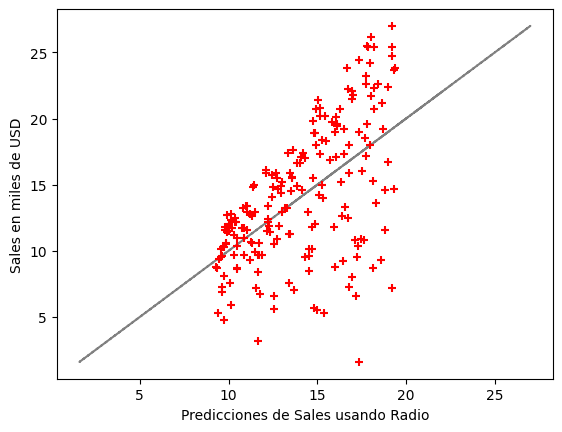

MSE: 18.09239774512544


In [114]:
lm = linear_model.LinearRegression()

X = df[["radio"]]
y = df["sales"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de Sales usando Radio")
plt.ylabel("Sales en miles de USD")
plt.show()
print ("MSE:", mean_squared_error(y, predictions))
prevMSE = mean_squared_error(y, predictions)

In [119]:
model.predict(np.array(15).reshape(-1,1))

/Users/maxdavidson/anaconda3/envs/regresion-lineal-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.34907485])

In [153]:
print('Fiteamos un modelo lineal simple con pendiente igual a :{}'.format(model.coef_))
print()
print('Su ordenada al origen es igual a: {}'.format(model.intercept_))

Fiteamos un modelo lineal simple con pendiente igual a :[0.20249578]

Su ordenada al origen es igual a: 9.311638095158285


$y = \beta_0 + \beta_1x + \varepsilon$


$\hat{\beta}_0$ (intercept) and $\hat{\beta}_1$ (slope)


$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x$


$e_i = y_i - \hat{y}_i$


$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_px_p + \varepsilon$


$\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_p$


$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + \ldots + \hat{\beta}_px_p$


$\text{TSS} = \sum_{i=1}^{n} (y_i - \bar{y})^2$


$\text{RSS} = \sum_{i=1}^{n} e_i^2$


$\text{RSS} = e_1^2 + e_2^2 + \ldots + e_n^2$


$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} e_i^2$


$R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}$
